In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

import relu_approximations as ra

Early stopping at epoch 106
Early stopping at epoch 237
Early stopping at epoch 573
Early stopping at epoch 221
Early stopping at epoch 628
Early stopping at epoch 400
Early stopping at epoch 976
Early stopping at epoch 1111
Early stopping at epoch 1632
Early stopping at epoch 193
Early stopping at epoch 766
Early stopping at epoch 765


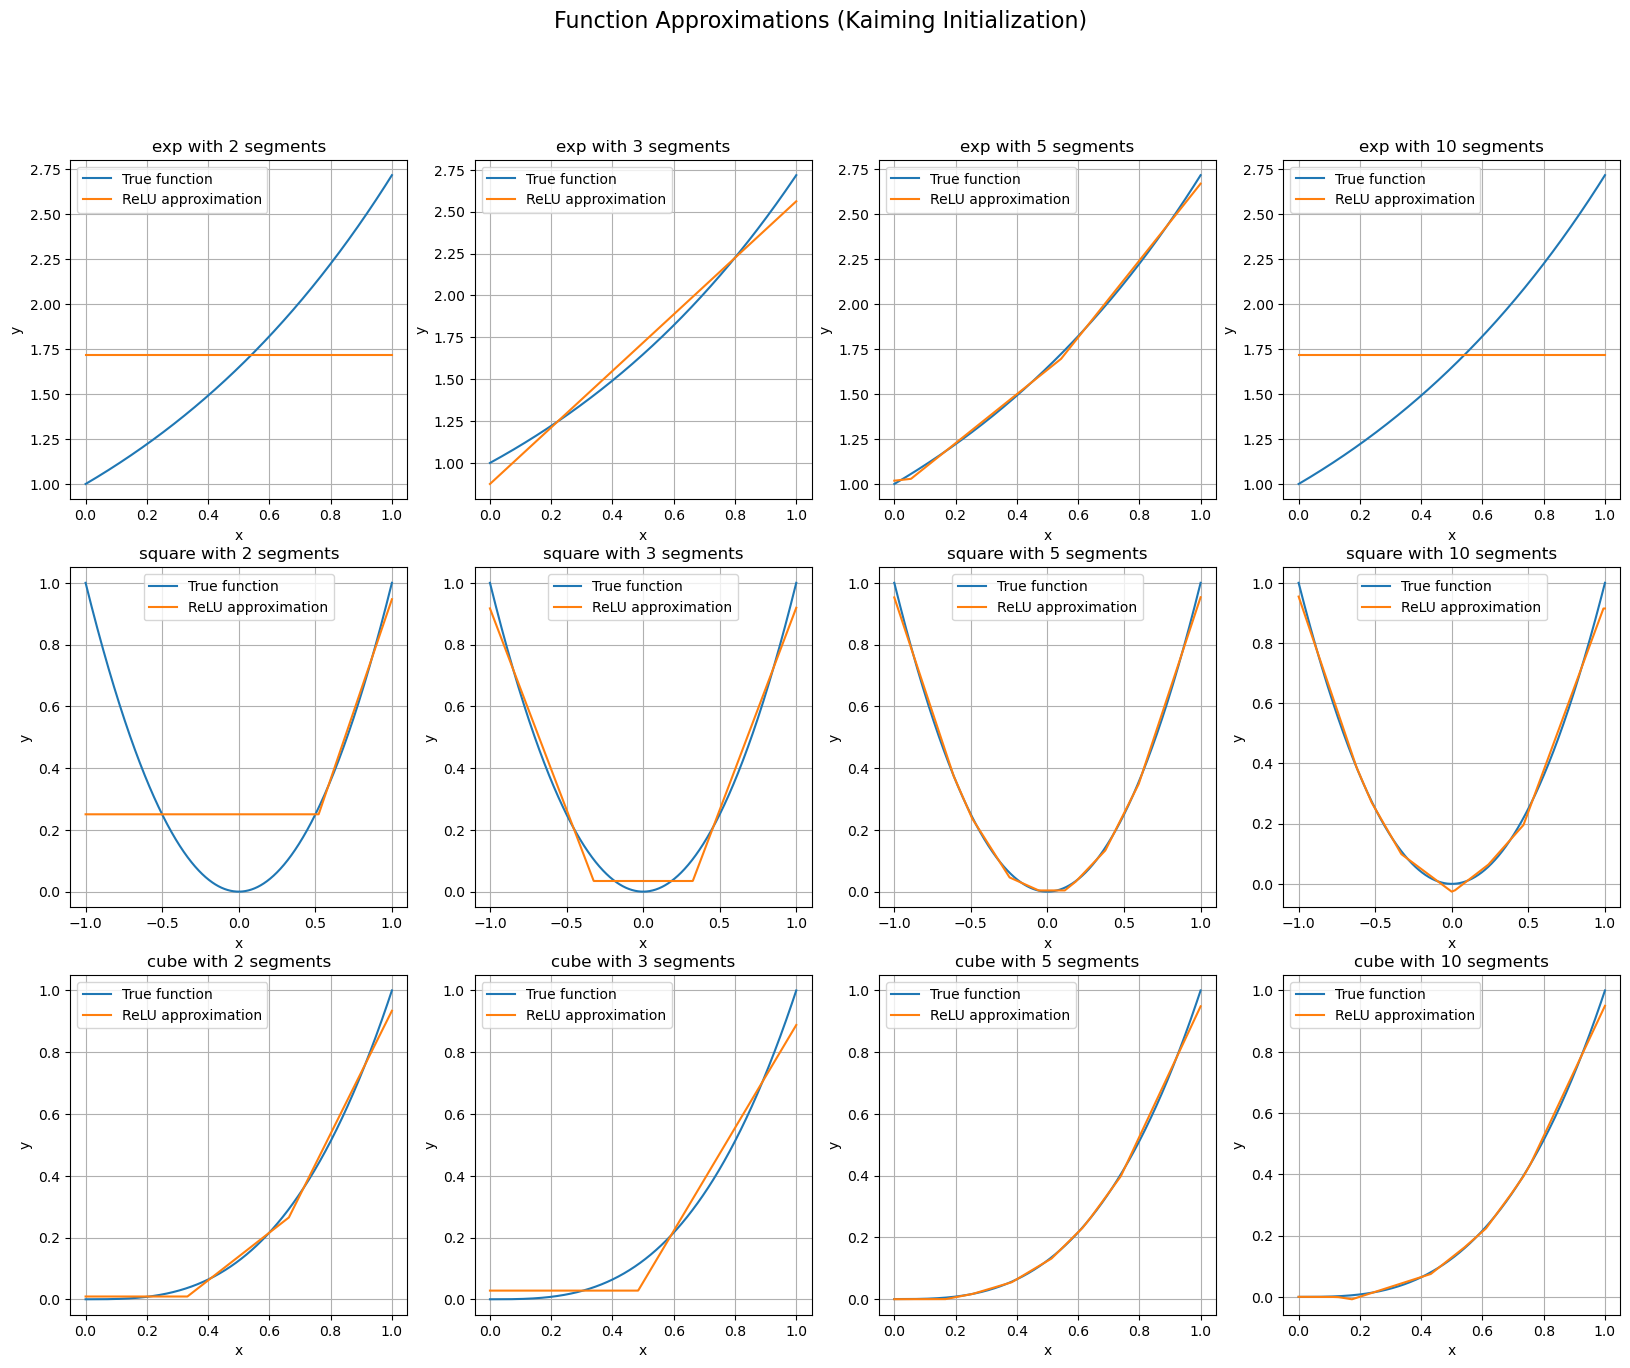

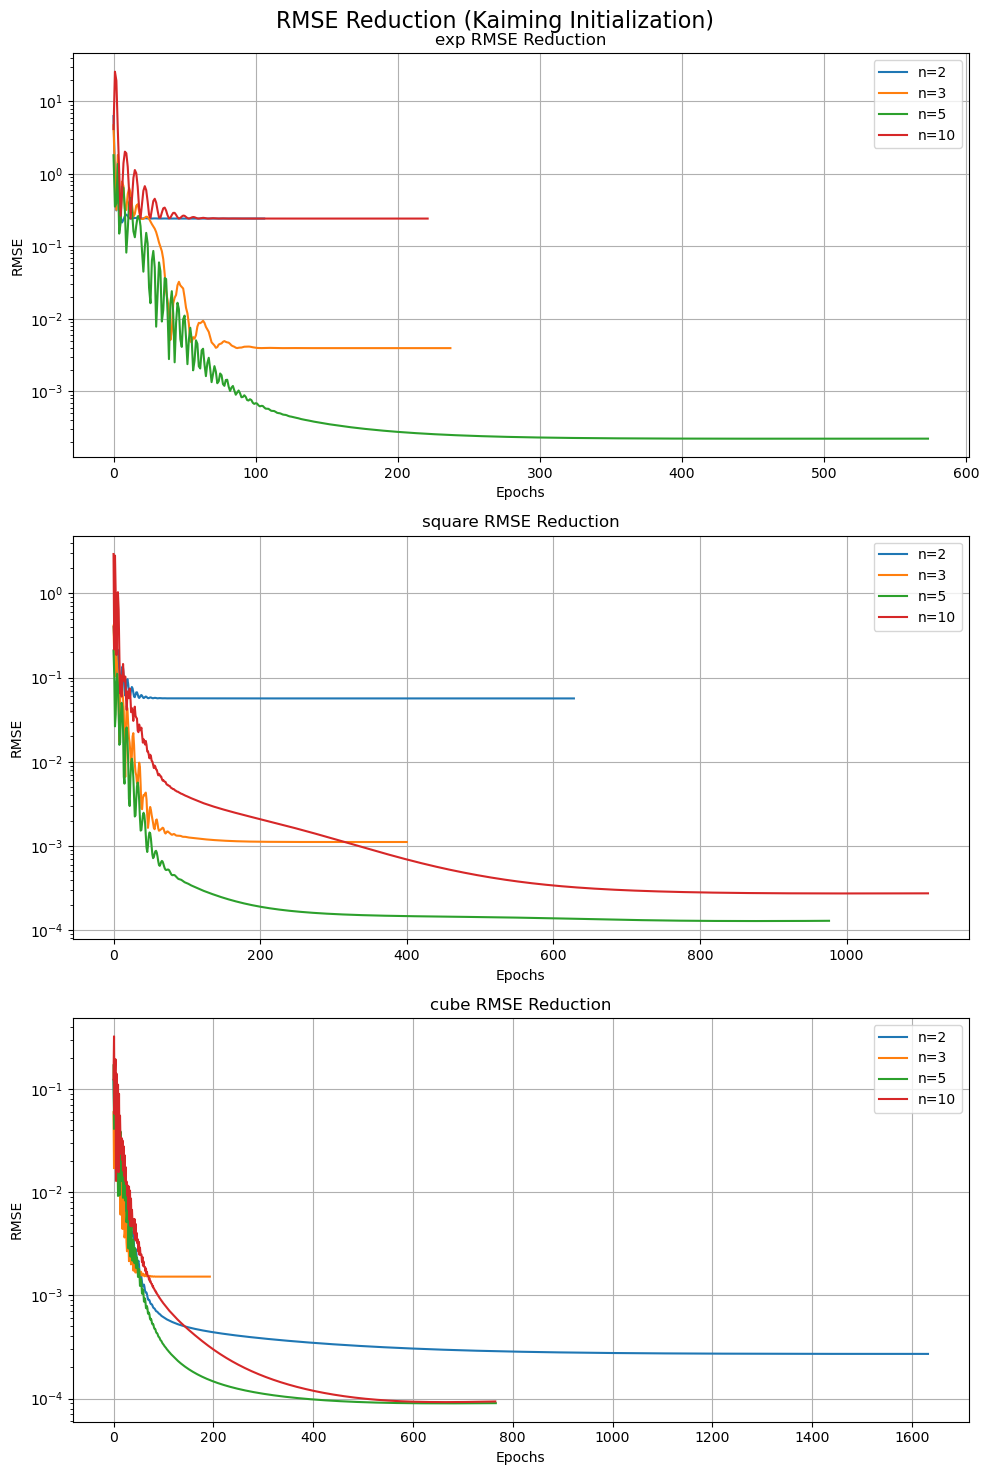

In [21]:
results = {}

fig_approx, axes_approx = plt.subplots(len(ra.functions), 4, figsize=(20, 5*len(ra.functions)))
fig_approx.suptitle('Function Approximations (Kaiming Initialization)', fontsize=16)

fig_rmse, axes_rmse = plt.subplots(len(ra.functions), 1, figsize=(10, 5*len(ra.functions)))
fig_rmse.suptitle('RMSE Reduction (Kaiming Initialization)', fontsize=16)

for i, (func_name, (func, x_range)) in enumerate(ra.functions.items()):
    results[func_name] = {}
    for j, n in enumerate([2, 3, 5, 10]):
        hidden_neurons = ra.neuron_mapping[func_name][n]
        
        model, losses = ra.train_network(func, x_range, hidden_neurons)
        l1_error, rmse = ra.compute_errors(func, model, x_range)
        
        results[func_name][n] = {
            'hidden_neurons': hidden_neurons,
            'L1_error': l1_error,
            'RMSE': rmse,
            'losses': losses,
            'model': model  
        }
        
        ra.plot_function_and_approximation(func, model, x_range, 
                                           f'{func_name} with {n} segments', axes_approx[i, j])
        
        axes_rmse[i].plot(range(len(losses)), losses, label=f'n={n}')
        axes_rmse[i].set_title(f'{func_name} RMSE Reduction')
        axes_rmse[i].set_xlabel('Epochs')
        axes_rmse[i].set_ylabel('RMSE')
        axes_rmse[i].set_yscale('log')
        axes_rmse[i].grid(True)
        axes_rmse[i].legend()

plt.tight_layout()
plt.show()




Results for exp function:
  n (number of segments): 2
    Hidden neurons: 5
    L1 error: 1.000501
    RMSE: 0.492496
  n (number of segments): 3
    Hidden neurons: 8
    L1 error: 0.155967
    RMSE: 0.062903
  n (number of segments): 5
    Hidden neurons: 10
    L1 error: 0.047297
    RMSE: 0.014937
  n (number of segments): 10
    Hidden neurons: 36
    L1 error: 1.000300
    RMSE: 0.492496

Results for square function:
  n (number of segments): 2
    Hidden neurons: 3
    L1 error: 0.749571
    RMSE: 0.237840
  n (number of segments): 3
    Hidden neurons: 4
    L1 error: 0.082781
    RMSE: 0.033402
  n (number of segments): 5
    Hidden neurons: 11
    L1 error: 0.047261
    RMSE: 0.011373
  n (number of segments): 10
    Hidden neurons: 24
    L1 error: 0.085348
    RMSE: 0.016554

Results for cube function:
  n (number of segments): 2
    Hidden neurons: 3
    L1 error: 0.065801
    RMSE: 0.016460
  n (number of segments): 3
    Hidden neurons: 5
    L1 error: 0.111872
    RMSE

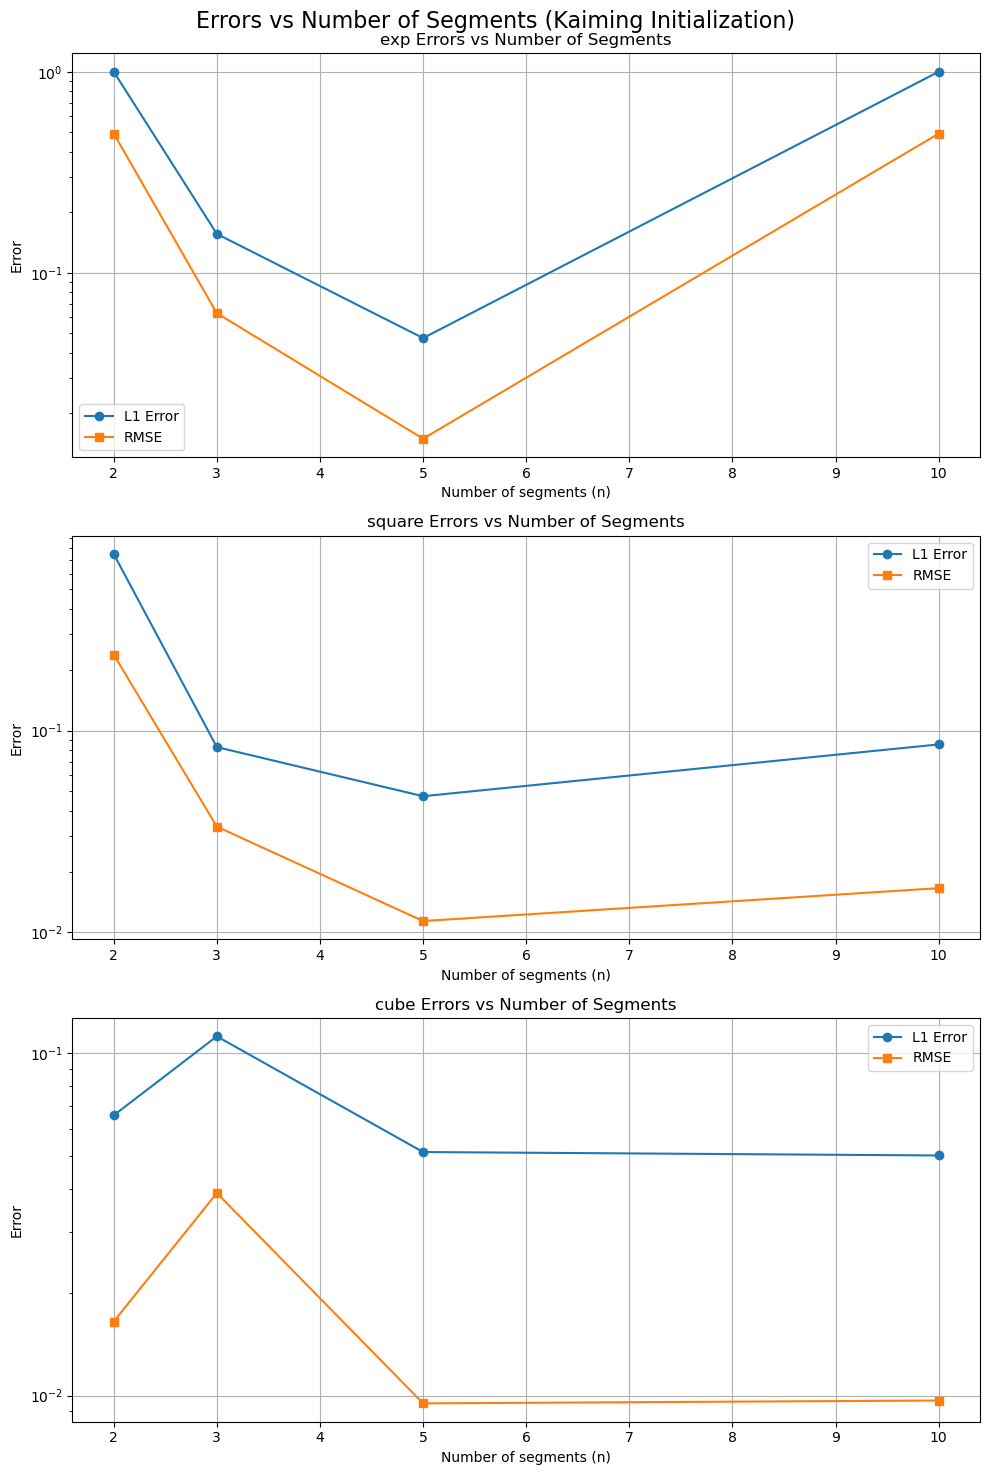

In [22]:
for func_name, func_results in results.items():
    print(f"\nResults for {func_name} function:")
    for n, data in func_results.items():
        print(f"  n (number of segments): {n}")
        print(f"    Hidden neurons: {data['hidden_neurons']}")
        print(f"    L1 error: {data['L1_error']:.6f}")
        print(f"    RMSE: {data['RMSE']:.6f}")

fig_error, axes_error = plt.subplots(len(ra.functions), 1, figsize=(10, 5*len(ra.functions)))
fig_error.suptitle('Errors vs Number of Segments (Kaiming Initialization)', fontsize=16)

for i, (func_name, func_results) in enumerate(results.items()):
    segments = list(func_results.keys())
    l1_errors = [func_results[s]['L1_error'] for s in segments]
    rmses = [func_results[s]['RMSE'] for s in segments]
    
    axes_error[i].plot(segments, l1_errors, 'o-', label='L1 Error')
    axes_error[i].plot(segments, rmses, 's-', label='RMSE')
    axes_error[i].set_title(f'{func_name} Errors vs Number of Segments')
    axes_error[i].set_xlabel('Number of segments (n)')
    axes_error[i].set_ylabel('Error')
    axes_error[i].legend()
    axes_error[i].set_yscale('log')
    axes_error[i].grid(True)

plt.tight_layout()
plt.show()